In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import qiskit as qiskit
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
# Loading your IBM Quantum account(s)
IBMQ.save_account(
    '280beccbee94456a161a6cbc217e1366bc278bf60e22bd30281fa0ca5bec6e50897278ef818f3c53f6700e04b9ed32ea364195044413b7e02836a79d886b03d9',
    overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\user\AppData\Local\Temp\ipykernel_3132\1018955272.py:11: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(
C:\Users\user\AppData\Local\Temp\ipykernel_3132\1018955272.py:11: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibm

In [20]:
backend = provider.get_backend('ibm_nairobi')
W1 = []
W2 = []
properties = backend.properties()
for i in range(6):
    print(f"________ Qubit number {i}__________")
    qubit = properties.qubits[i]

    anharmonicity_data = next(item for item in qubit if item.name == "anharmonicity")
    frequency_data = next(item for item in qubit if item.name == "frequency")

    E_J = (2 * (2 * frequency_data.value + anharmonicity_data.value)) / anharmonicity_data.value
    E_C = anharmonicity_data.value
    E = np.sqrt(8*E_J*E_C)


    w10 = E - E_C
    w21 = 2*E - 3*E_C -w10

    W1.append(w10)
    W2.append(w21)
    #print(f"E_J: {E_J} GHz")
    #print(f"E_C: {E_C} GHz")

    print(f"w10: {w10} GHz")
    print(f"w21: {w21} GHz")

________ Qubit number 0__________
w10: 13.103004363906933 GHz
w21: 13.442838958842415 GHz
________ Qubit number 1__________
w10: 12.989892668840197 GHz
w21: 13.330476148108731 GHz
________ Qubit number 2__________
w10: 13.120025932060733 GHz
w21: 13.458929620868515 GHz
________ Qubit number 3__________
w10: 12.807411127987644 GHz
w21: 13.149941504058143 GHz
________ Qubit number 4__________
w10: 12.998428462703568 GHz
w21: 13.33901886245275 GHz
________ Qubit number 5__________
w10: 13.14361755037553 GHz
w21: 13.484149870810647 GHz


In [21]:
t = 100
for w2 in W2:
    for w1 in W1:
        if w2 - w1 < t:
            t = w2 - w1
    print(t)
    t = 100


0.2992214084668845
0.18685859773320068
0.3153120704929844
0.006323953682612071
0.19540131207721956
0.3405323204351163


In [27]:
qr = QuantumRegister(7)
cr = ClassicalRegister(7)
qc = QuantumCircuit(qr,cr)
qc.x(3)
qc.barrier()
qc.cx(5, 6)
qc.barrier()
qc.x(3)
qc.measure(qr[3], cr[3])
qc.measure(qr[5], cr[5])
#qc.draw(output='mpl')

In [28]:
from qiskit.tools import job_monitor  #Run
job = backend.run(transpile(qc, backend, scheduling_method="alap"), shots=1000)

#job = qiskit.execute(qc, provider.get_backend('ibm_lagos'), shots=8000)
job_monitor(job)

Job Status: job has successfully run


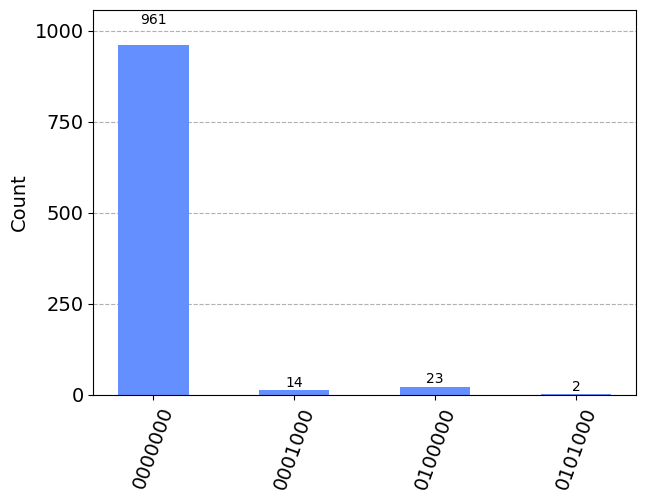

In [29]:
from qiskit.visualization import plot_histogram

plot_histogram(job.result().get_counts(qc))